# INTRODUCTION

This is my capstone project for Google's 'Data Analytics Professional Certificate'.

The case study will solve a real-world business problem to be tackled using the 6 Phase Analysis methodology **(Ask, Prepare, Process, Analyze, Share, Act)**.

The following is my case study analysis of Bike-Share Comapny; based on historical data of the real Chicago bike-share company, [Divvy](http://divvybikes.com/).

# SCENARIO

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

**Characters and teams** 

● Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

● Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals —as well as how you, as a junior data analyst, can help Cyclistic achieve them. 

● Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

**About the company**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago.The bikes can be unlocked from one station and returned to any other station in the system anytime. 

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the fexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. 

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders in to members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs. 

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

# ASK

**Three questions will guide the future marketing program:**
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships? 
3. How can Cyclistic use digital media to infuence casual riders to become members?

**Guiding Questions**

● What is the problem you are trying to solve?
  
  The main objective is to understand how casual riders and annual members use Cyclistic bikes differently.

● How can your insights drive business decisions?

  The insights will help the marketing team to increase annual members.



# PREPARE

The [dataset](http://divvy-tripdata.s3.amazonaws.com/index.html) used are from Cyclistic’s historical trip data to analyze and identify trends. Their data is stored in csv files, organized and seperated by the month the rides took place. 

In this case we have to download twelve csv files, one file represent one month of trip data. We will be working with the data available over a 12 month period, in this case from January 2021 to December 2021. 

# PROCESS

Loading libraries necessary for all steps in the analysis proccess of Bike Share's historical data

In [1]:
library(tidyverse)
library(janitor)
library(lubridate)
library(ggplot2)
library(hms) #time
library(data.table) #exporting data frame

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘hms’


The following object is masked from ‘package:lubridate’:

    hms



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


Importing 12 month datasets (January 2021 to December 2021) into RStudio using read.csv function

In [2]:
#Importing the CSV files
jan01_df <- read_csv("../input/csv-files/202101-divvy-tripdata.csv") 
feb02_df <- read_csv("../input/csv-files/202102-divvy-tripdata.csv") 
mar03_df <- read_csv("../input/csv-files/202103-divvy-tripdata.csv")
apr04_df <- read_csv("../input/csv-files/202104-divvy-tripdata.csv")
may05_df <- read_csv("../input/csv-files/202105-divvy-tripdata.csv")
jun06_df <- read_csv("../input/csv-files/202106-divvy-tripdata.csv")
jul07_df <- read_csv("../input/csv-files/202107-divvy-tripdata.csv")
aug08_df <- read_csv("../input/csv-files/202108-divvy-tripdata.csv")
sep09_df <- read_csv("../input/csv-files/202109-divvy-tripdata.csv")
oct10_df <- read_csv("../input/csv-files/202110-divvy-tripdata.csv")
nov11_df <- read_csv("../input/csv-files/202111-divvy-tripdata.csv")
dec12_df <- read_csv("../input/csv-files/202112-divvy-tripdata.csv")

Rows: 83713 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): ride_id, rideable_type, started_at, ended_at, start_station_name, s...
dbl (4): start_lat, start_lng, end_lat, end_lng

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
Rows: 49622 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): ride_id, rideable_type, started_at, ended_at, start_station_name, s...
dbl (4): start_lat, start_lng, end_lat, end_lng
lgl (5): ...14, ...15, ...16, ...17, ...18

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
•

Examining the individual datasets

In [3]:
# Inspect the dataframes and look for incongruencies
str(jan01_df)

str(feb02_df)

str(mar03_df)

str(apr04_df)

str(may05_df)

str(jun06_df)

str(jul07_df)

str(aug08_df)

str(sep09_df)

str(oct10_df)

str(nov11_df)

str(dec12_df)

spc_tbl_ [83,713 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:83713] "B9F73448DFBE0D45" "457C7F4B5D3DA135" "57C750326F9FDABE" "4D518C65E338D070" ...
 $ rideable_type     : chr [1:83713] "classic_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr [1:83713] "24-01-2021 19:15" "23-01-2021 12:57" "09-01-2021 15:28" "09-01-2021 15:28" ...
 $ ended_at          : chr [1:83713] "24-01-2021 19:22" "23-01-2021 13:02" "09-01-2021 15:37" "09-01-2021 15:37" ...
 $ start_station_name: chr [1:83713] "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:83713] "17660" "17660" "17660" "17660" ...
 $ end_station_name  : chr [1:83713] "Wood St & Augusta Blvd" "California Ave & North Ave" "Wood St & Augusta Blvd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : chr [1:83713] "657" "13258" "657" "657" ...
 $ start_lat         : num [1:83713] 41.

**Concatenating**

All the csvs files will be concatenated into one dataframe. 

In [4]:
# Combining the individual files into one using rbind()
bikerides <- bind_rows(jan01_df, feb02_df, mar03_df, apr04_df, may05_df, jun06_df, jul07_df, aug08_df, sep09_df, oct10_df, nov11_df, dec12_df)


In [5]:
# Confirming the total number of rows for the individual dataframes
rowtotal <- sum(nrow(jan01_df), nrow(feb02_df), nrow(mar03_df), nrow(apr04_df), nrow(may05_df), nrow(jun06_df), nrow(jul07_df), nrow(aug08_df), nrow(sep09_df), nrow(oct10_df), nrow(nov11_df), nrow(dec12_df))
print (rowtotal)

[1] 4664280


In [6]:
# Confirming the total number of rows for the combined dataframe
print (nrow(bikerides))

[1] 4664280


In [7]:
str(bikerides)

spc_tbl_ [4,664,280 × 18] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4664280] "B9F73448DFBE0D45" "457C7F4B5D3DA135" "57C750326F9FDABE" "4D518C65E338D070" ...
 $ rideable_type     : chr [1:4664280] "classic_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr [1:4664280] "24-01-2021 19:15" "23-01-2021 12:57" "09-01-2021 15:28" "09-01-2021 15:28" ...
 $ ended_at          : chr [1:4664280] "24-01-2021 19:22" "23-01-2021 13:02" "09-01-2021 15:37" "09-01-2021 15:37" ...
 $ start_station_name: chr [1:4664280] "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:4664280] "17660" "17660" "17660" "17660" ...
 $ end_station_name  : chr [1:4664280] "Wood St & Augusta Blvd" "California Ave & North Ave" "Wood St & Augusta Blvd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : chr [1:4664280] "657" "13258" "657" "657" ...
 $ start_lat         

In [8]:
head (bikerides)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,...14,...15,...16,...17,...18
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
B9F73448DFBE0D45,classic_bike,24-01-2021 19:15,24-01-2021 19:22,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.90036,-87.69670,41.89918,-87.67220,member,NA,NA,NA,NA,NA
457C7F4B5D3DA135,electric_bike,23-01-2021 12:57,23-01-2021 13:02,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.90041,-87.69673,41.91044,-87.69689,member,NA,NA,NA,NA,NA
57C750326F9FDABE,electric_bike,09-01-2021 15:28,09-01-2021 15:37,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.90037,-87.69669,41.89918,-87.67218,casual,NA,NA,NA,NA,NA
4D518C65E338D070,electric_bike,09-01-2021 15:28,09-01-2021 15:37,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.90038,-87.69672,41.89915,-87.67218,casual,NA,NA,NA,NA,NA
9D08A3AFF410474D,classic_bike,24-01-2021 15:56,24-01-2021 16:07,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.90036,-87.69670,41.89918,-87.67220,casual,NA,NA,NA,NA,NA
49FCE1F8598F12C6,electric_bike,22-01-2021 15:15,22-01-2021 15:36,California Ave & Cortez St,17660,Wells St & Elm St,KA1504000135,41.90037,-87.69679,41.90327,-87.63446,member,NA,NA,NA,NA,NA


**Data cleaning**
The time format is currently yyyy-mm-dd hh:mm:ss to do a deeper analysis it is best to format into indiviudal columns and add a day of the week column.

In [9]:
# Add columns that list the date, month, day, and year of each ride
bikerides$date <- as.Date(bikerides$started_at)

bikerides$month <- format(as.Date(bikerides$date), "%b")

bikerides$day <- format(as.Date(bikerides$date), "%d")

bikerides$year <- format(as.Date(bikerides$date), "%Y")

bikerides$day_of_week <- format(as.Date(bikerides$date), "%A")

In [10]:
head(bikerides)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,...14,...15,...16,...17,...18,date,month,day,year,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<date>,<chr>,<chr>,<chr>,<chr>
B9F73448DFBE0D45,classic_bike,24-01-2021 19:15,24-01-2021 19:22,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.90036,-87.69670,⋯,NA,NA,NA,NA,NA,24-01-20,Jan,20,24,Saturday
457C7F4B5D3DA135,electric_bike,23-01-2021 12:57,23-01-2021 13:02,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.90041,-87.69673,⋯,NA,NA,NA,NA,NA,23-01-20,Jan,20,23,Friday
57C750326F9FDABE,electric_bike,09-01-2021 15:28,09-01-2021 15:37,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.90037,-87.69669,⋯,NA,NA,NA,NA,NA,9-01-20,Jan,20,9,Tuesday
4D518C65E338D070,electric_bike,09-01-2021 15:28,09-01-2021 15:37,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.90038,-87.69672,⋯,NA,NA,NA,NA,NA,9-01-20,Jan,20,9,Tuesday
9D08A3AFF410474D,classic_bike,24-01-2021 15:56,24-01-2021 16:07,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.90036,-87.69670,⋯,NA,NA,NA,NA,NA,24-01-20,Jan,20,24,Saturday
49FCE1F8598F12C6,electric_bike,22-01-2021 15:15,22-01-2021 15:36,California Ave & Cortez St,17660,Wells St & Elm St,KA1504000135,41.90037,-87.69679,⋯,NA,NA,NA,NA,NA,22-01-20,Jan,20,22,Thursday


**DATA CLEANING**

**Removing Duplicates**

Removing duplicates to ensure each ride has one unique, corresponding observation/row

In [11]:
# Remove duplicates from dataframe
bikerides_no_duplicates <- bikerides[!duplicated(bikerides$ride_id), ]
print(paste("Removed", nrow(bikerides) - nrow(bikerides_no_duplicates), "duplicate rows"))

[1] "Removed 1436 duplicate rows"


**DATA MANIPULATION**

Clean the data, and prepare the data for analysis:

In [12]:
# Creating a column to determine the ride length 
bikerides_v2 <- mutate(bikerides_no_duplicates, ride_length = difftime(ended_at, started_at, units = "mins"))
str(bikerides_v2)

tibble [4,662,844 × 24] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4662844] "B9F73448DFBE0D45" "457C7F4B5D3DA135" "57C750326F9FDABE" "4D518C65E338D070" ...
 $ rideable_type     : chr [1:4662844] "classic_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr [1:4662844] "24-01-2021 19:15" "23-01-2021 12:57" "09-01-2021 15:28" "09-01-2021 15:28" ...
 $ ended_at          : chr [1:4662844] "24-01-2021 19:22" "23-01-2021 13:02" "09-01-2021 15:37" "09-01-2021 15:37" ...
 $ start_station_name: chr [1:4662844] "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:4662844] "17660" "17660" "17660" "17660" ...
 $ end_station_name  : chr [1:4662844] "Wood St & Augusta Blvd" "California Ave & North Ave" "Wood St & Augusta Blvd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : chr [1:4662844] "657" "13258" "657" "657" ...
 $ start_lat         : num [1:46628

In [13]:
# filtering out trips with a ride length less than 0.
nrow(bikerides_v2[bikerides_v2$ride_length < 0,])
bikerides_v3 <- bikerides_v2[!bikerides_v2$ride_length <0,]
glimpse(bikerides_v3)

[1] 1165

Rows: 4,661,679
Columns: 24
$ ride_id            <chr> "B9F73448DFBE0D45", "457C7F4B5D3DA135", "57C750326F…
$ rideable_type      <chr> "classic_bike", "electric_bike", "electric_bike", "…
$ started_at         <chr> "24-01-2021 19:15", "23-01-2021 12:57", "09-01-2021…
$ ended_at           <chr> "24-01-2021 19:22", "23-01-2021 13:02", "09-01-2021…
$ start_station_name <chr> "California Ave & Cortez St", "California Ave & Cor…
$ start_station_id   <chr> "17660", "17660", "17660", "17660", "17660", "17660…
$ end_station_name   <chr> "Wood St & Augusta Blvd", "California Ave & North A…
$ end_station_id     <chr> "657", "13258", "657", "657", "657", "KA1504000135"…
$ start_lat          <dbl> 41.90036, 41.90041, 41.90037, 41.90038, 41.90036, 4…
$ start_lng          <dbl> -87.69670, -87.69673, -87.69669, -87.69672, -87.696…
$ end_lat            <dbl> 41.89918, 41.91044, 41.89918, 41.89915, 41.89918, 4…
$ end_lng            <dbl> -87.67220, -87.69689, -87.67218, -87.67218, -87.672…
$ member_cas

In [14]:
# determining the amount of members vs casual riders
rider_type_total <- table(bikerides_v3$member_casual)
View(rider_type_total)


 casual  member 
2077441 2584238 

# ANALYZE

I have used the useful functions from the dplyr package to group and aggregate the cleaned data to our choosing. Then to visualize we'll use the ggplot package. 

In [15]:
# Statistical analysis
trip_stats <- bikerides_v3 %>%
  group_by(member_casual) %>%
  summarise(average_ride_length = mean(ride_length), standard_deviation = sd(ride_length), median_ride_length = median(ride_length), min_ride_length = min(ride_length), max_ride_length = max(ride_length))
head(trip_stats)

member_casual,average_ride_length,standard_deviation,median_ride_length,min_ride_length,max_ride_length
<chr>,<drtn>,<dbl>,<drtn>,<drtn>,<drtn>
casual,7247.672 mins,93628.43,0 mins,0 mins,15252480 mins
member,1502.776 mins,28088.56,0 mins,0 mins,1052640 mins


In [16]:
# Determine the mode for the day of the week
getmode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

weekday_mode <- getmode(bikerides_v3$day_of_week)
print(weekday_mode)

[1] "Sunday"


In [17]:
# Analyze ridership data by type and weekday
bikerides_v3$day_of_week <- ordered(bikerides_v3$day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
bikerides_v3 %>%
  group_by(member_casual, day_of_week) %>%
  summarise(rider_type_total = n(), average_ride_length = mean(ride_length)) %>%
  arrange(member_casual, day_of_week)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,rider_type_total,average_ride_length
<chr>,<ord>,<int>,<drtn>
casual,Monday,308704,8049.015 mins
casual,Tuesday,302207,7164.916 mins
casual,Wednesday,286192,7549.756 mins
casual,Thursday,295279,7835.669 mins
casual,Friday,293559,6583.554 mins
casual,Saturday,285799,6717.044 mins
casual,Sunday,305701,6803.335 mins
member,Monday,364410,1538.478 mins
member,Tuesday,367731,1576.058 mins


In [18]:
# Determining the most popular months during 2021
popular_month <- bikerides_v3 %>%
  group_by(month) %>%
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>%
  arrange(-number_of_rides)

View(popular_month)

month,number_of_rides,average_duration
<chr>,<int>,<drtn>
Jul,692805,4833.851 mins
Aug,675270,3860.299 mins
Sep,621882,3593.445 mins
Jun,609646,6088.695 mins
Oct,479199,2897.234 mins
May,450756,5113.163 mins
Apr,337095,4376.870 mins
Nov,256594,1809.886 mins
Mar,228450,3161.110 mins


In [19]:
# Determine the most popular start station
station_mode <- getmode(bikerides_v3$start_station_name)

print(station_mode)

[1] "Streeter Dr & Grand Ave"


In [20]:
# Determine the most popular start station for members
popular_start_stations_member <- bikerides_v3 %>% 
  filter(member_casual == 'member') %>% 
  group_by(start_station_name) %>% 
  summarise(number_of_starts = n()) %>% 
  filter(start_station_name != "") %>% 
  arrange(- number_of_starts)

head(popular_start_stations_member)


start_station_name,number_of_starts
<chr>,<int>
Clark St & Elm St,24002
Kingsbury St & Kinzie St,22898
Wells St & Concord Ln,22862
Wells St & Elm St,20324
Dearborn St & Erie St,18861
St. Clair St & Erie St,18349


In [21]:
# Determine the most popular start station for casual riders
popular_start_stations_casual <- bikerides_v3 %>% 
  filter(member_casual == 'casual') %>% 
  group_by(start_station_name) %>% 
  summarise(number_of_starts = n()) %>% 
  filter(start_station_name != "") %>% 
  arrange(- number_of_starts)

head(popular_start_stations_casual)

start_station_name,number_of_starts
<chr>,<int>
Streeter Dr & Grand Ave,64495
Millennium Park,32269
Michigan Ave & Oak St,28883
Shedd Aquarium,22596
Theater on the Lake,20657
Lake Shore Dr & Monroe St,19135


Key Analysis takeways:

* There were more members(2584238) than casual riders(2077441) in the year 2021.

* Casual riders(7247.672 mins) had a higher average ride length than members(1502.776 mins).

* Casual riders had the longest ride time being 15252480 mins or 254208 hours.

* The most popular day for bike sharing was Sunday.

* The most popular day for casual riders was Monday with an average ride length of 8049.015 mins.

* The most popular day for members was Friday with an average ride length of 1322.194 mins

* The most popular month was July with 692805 rides with an average ride duration of 4833.851 mins.

* The least popular month was February with 49608 rides with an average ride duration of 4420.522 mins.

* The most popular start station overall was "Streeter Dr & Grand Ave".

* The most popular start station for members was "Clark St & Elm St" with 24002 trips starting from here.

* The most popular start station for casual riders was "Streeter Dr & Grand Ave" with 64495 trips starting from here.

# SHARE & ACT

I developed a visualization that clearly shows the variations in ride activity over the course of the week as well as the differences in ride patterns between casual and member cyclists after evaluating the data and obtaining insights into it.

**Data Visualizations in R**

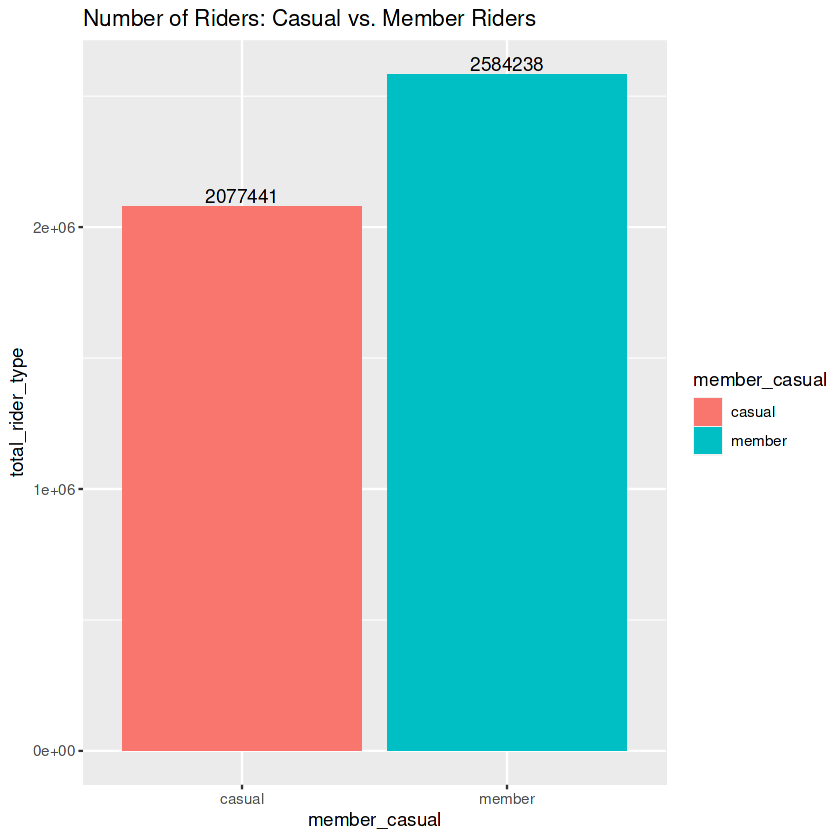

In [22]:
# Visualization of the total number of riders by member type
bikerides_v3 %>% 
  group_by(member_casual) %>% 
  summarise(total_rider_type = n()) %>% 
  ggplot(aes(x = member_casual, y = total_rider_type, fill = member_casual)) + 
  geom_col(position = "dodge") + geom_text(aes(label = total_rider_type, vjust = -0.25)) +
  labs(title = "Number of Riders: Casual vs. Member Riders")

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.
Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


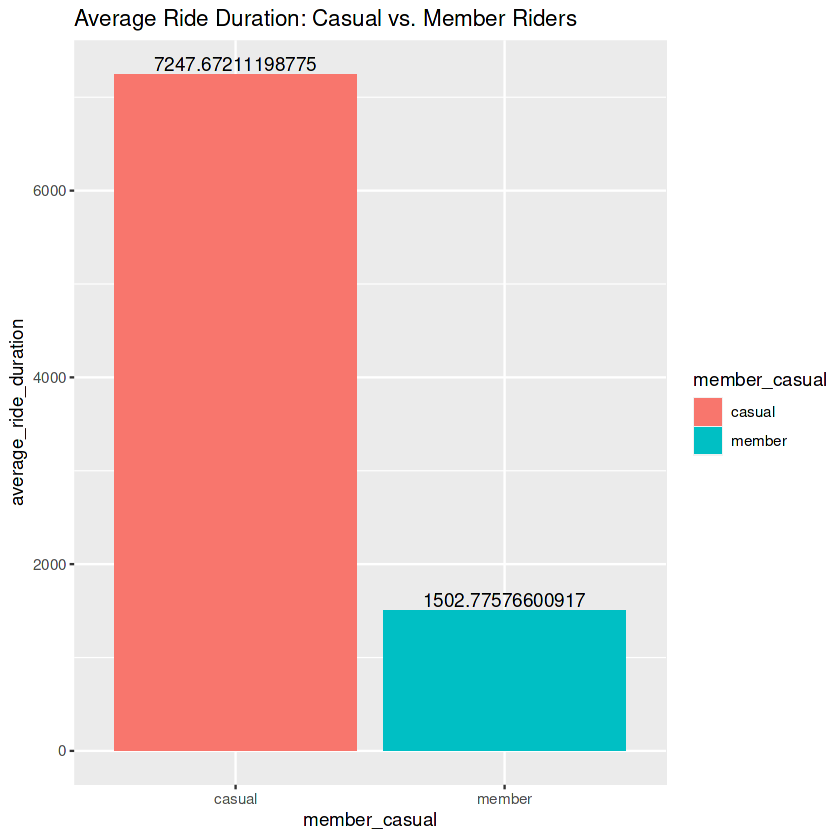

In [23]:
# Visualization of the rider types ride duration

rider_type_average_duration <- bikerides_v3 %>% 
  group_by(member_casual) %>% 
  summarize(average_ride_duration = mean(ride_length))

rider_type_average_duration %>% 
  ggplot(aes(x = member_casual, y = average_ride_duration, fill = member_casual)) +
  geom_col(position = "dodge") + geom_text(aes(label = average_ride_duration, vjust = -0.25)) +
  labs(title = "Average Ride Duration: Casual vs. Member Riders")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


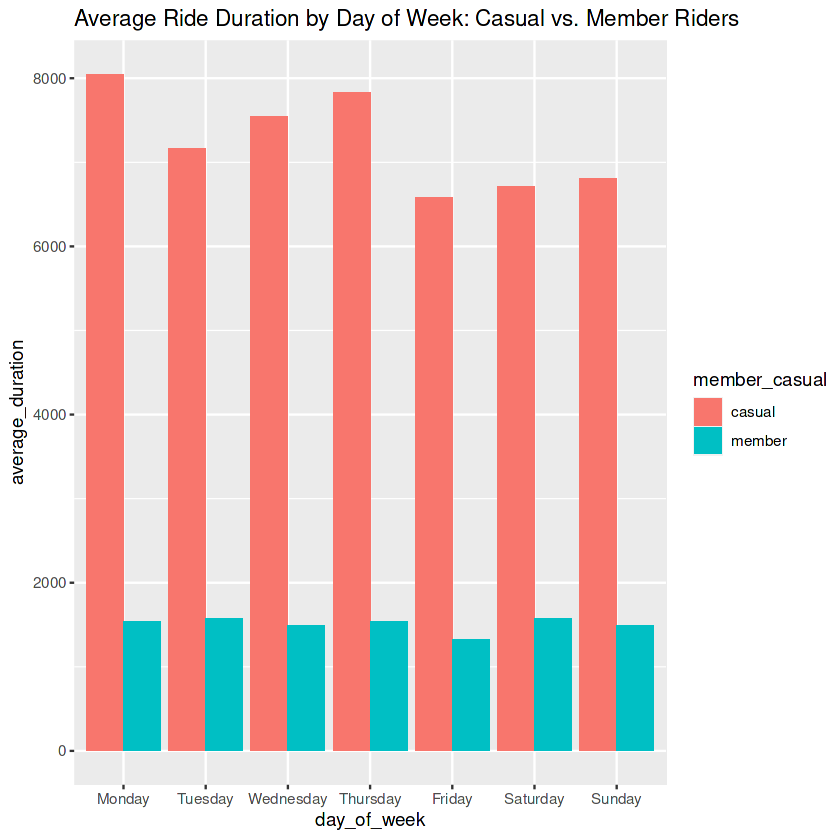

In [24]:
# Visualization of the usage by members and casual riders by the weekday

bikerides_v3 %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n(),average_duration = mean(ride_length)) %>% 
  arrange(member_casual, day_of_week)  %>% 
  ggplot(aes(x = day_of_week, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Average Ride Duration by Day of Week: Casual vs. Member Riders")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


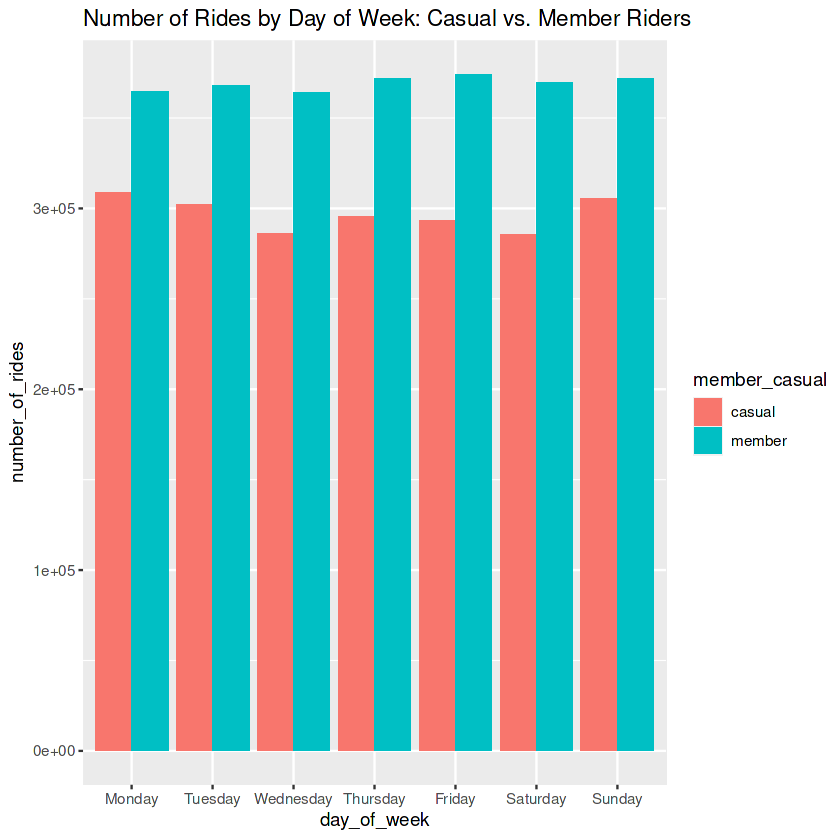

In [25]:
# Visualization of the number of trips by members and casual riders by the weekday


bikerides_v3 %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n(),average_duration = mean(ride_length)) %>% 
  arrange(member_casual, day_of_week)  %>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of Rides by Day of Week: Casual vs. Member Riders")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


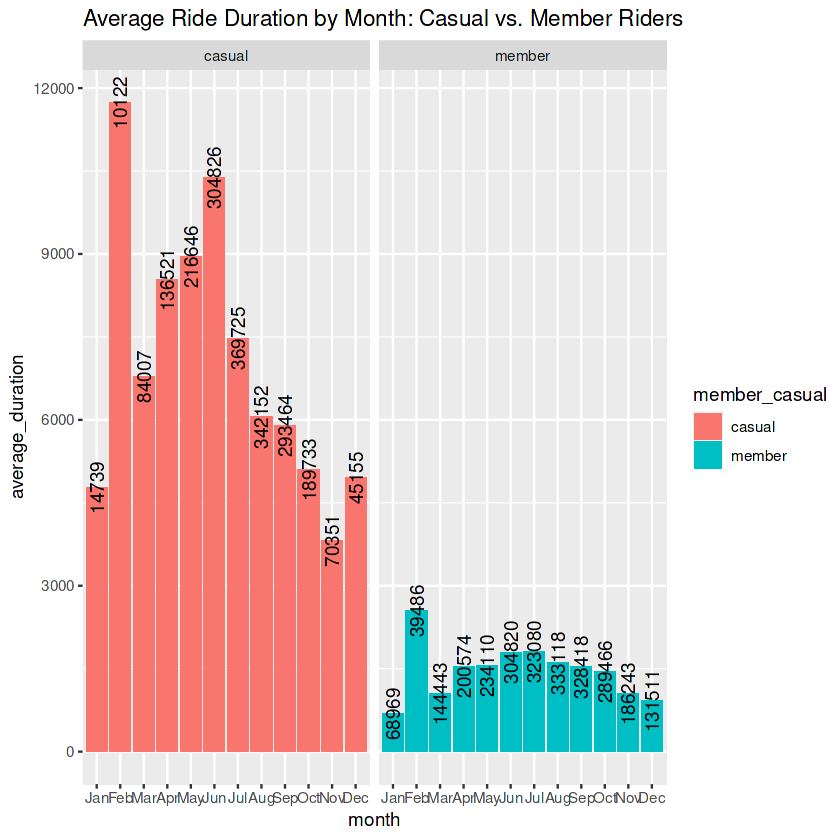

In [26]:
# Visualization of the usage by members and casual riders by the month

bikerides_v3$month <- ordered(bikerides_v3$month, levels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))

bikerides_v3 %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n(),average_duration = mean(ride_length) ) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = number_of_rides, angle = 90)) +
  facet_wrap(~member_casual) + 
  labs(title = "Average Ride Duration by Month: Casual vs. Member Riders")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


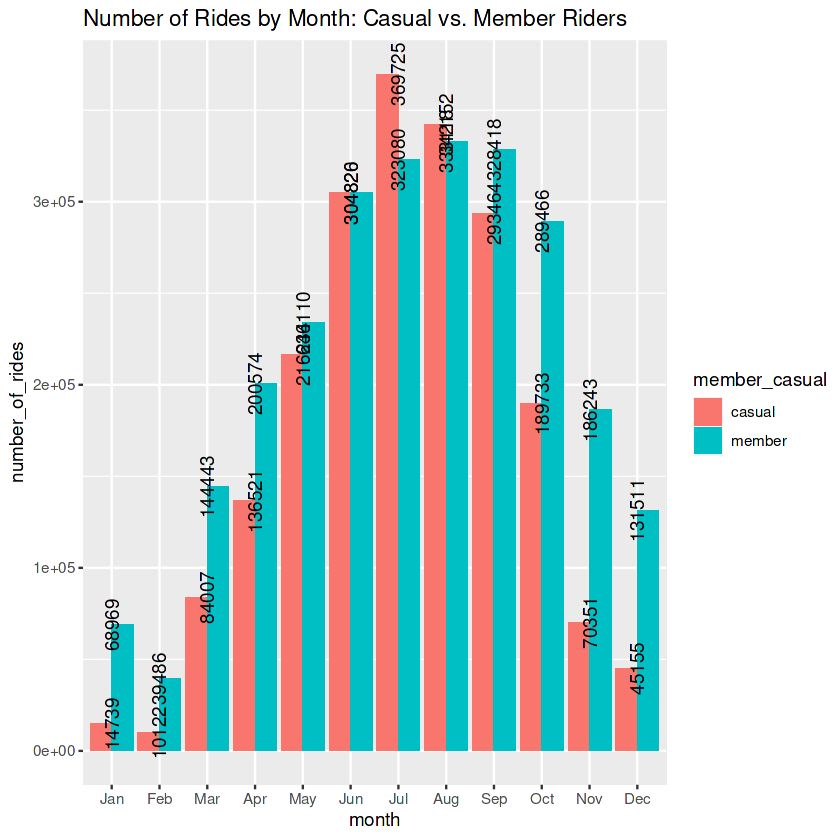

In [27]:
# Visualization of the number of trips by members and casual riders by the month

bikerides_v3 %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = number_of_rides, angle = 90)) +
  labs(title = "Number of Rides by Month: Casual vs. Member Riders")


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


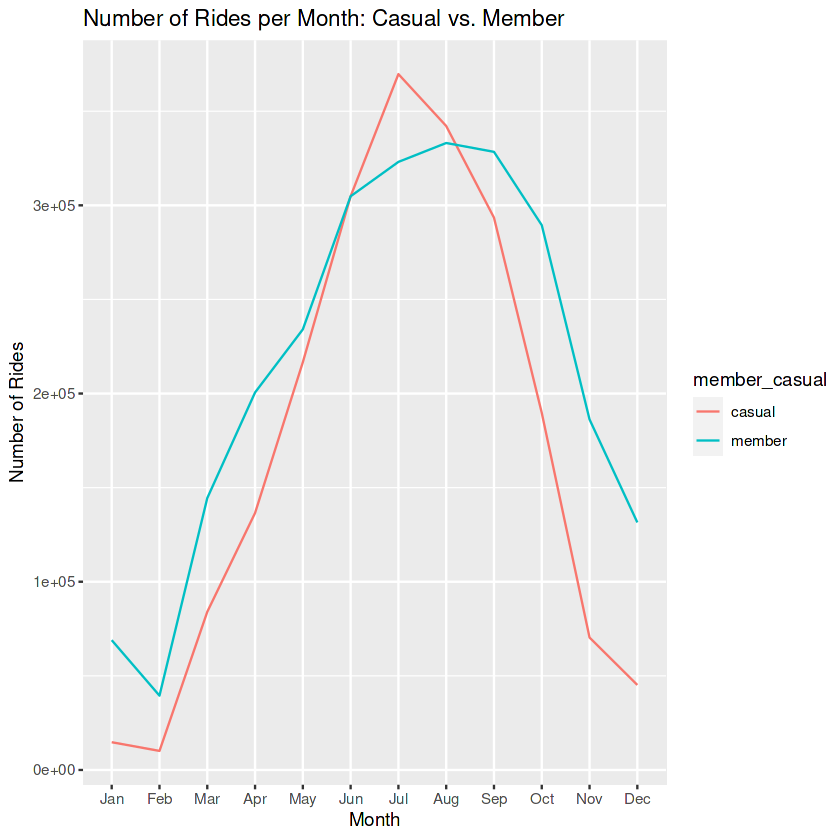

In [28]:
bikerides_v3 %>%
  group_by(member_casual, month) %>%
  summarise(number_of_rides = n()) %>%
  ggplot(aes(x = month, y = number_of_rides, color = member_casual, group = member_casual)) +
  geom_line() +
  labs(title = "Number of Rides per Month: Casual vs. Member", x = "Month", y = "Number of Rides")



**Key Insights**

* The ride behaviors of casual and member riders were clearly different. Over the course of the year, member riders showed regular and consistent riding habits, indicating a higher degree of involvement and loyalty. Conversely, casual riders' riding patterns were more irregular and erratic, frequently spiking on weekends and holidays.

* Bike ride seasonality. I saw a spike in ride activity in the summer, which suggests a direct link between good weather and more people riding bikes. This research supports the hunch that when the weather is nice, people are more likely to ride their bikes for pleasure and transit.

* Compared to casual riders, member riders consistently showed shorter average ride durations. This conclusion might be explained by the fact that frequent users of the bike share program are more adept at navigating the city and finishing their journeys faster. On the other hand, casual riders typically take lengthier rides since they might not be as familiar with the system.

**TOP 3 RECOMMENDATIONS FROM DATA-DRIVEN INSIGHTS**

1. Target casual users who are most likely to be annual members but have not yet purchased an annual subscription. The most obvious example of this is during the peak commute times of the workweek (e.g. 8:00 am to 5:00 pm), when both groups reach their highest ride counts. Marketing should focus on these casual riders who use Cyclistic bikes to commute to/from work. It should emphasize the value of using a membership rather than a one ride/day pass, and highlight the lower rates Cyclistic members get for their e-bikes. Since casual users tend to use e-bikes more during those commute times, we should implement ad placements at locations and stations where those workweek commutes take place.

2. Create a marketing campaign targeting casual users who are frequently using Cyclistic bikes for leisure and exercise. These customers are most likely who are taking rides when times/conditions are ideal; weekends when they're off work, months when weather is suitable for riding. Therefore the timing of rolling out this plan is key. It is recommended to start this campaign at the begining of Spring, when the weather is warming up and there are many months ahead of ideal riding conditions. Emphasize the healthy lifestyle that is associated with Cyclistic as a brand. Along with on the ground marketing, use social media for targeted ad placements in order to successfully reach this specific customer segment.

3. Implement a membership trial period so that infrequent riders can benefit from annual membership without having to pay for the entire year up front. In order to persuade infrequent riders to upgrade to an annual membership, this trial period may include cheaper rates or extra benefits. It lowers obstacles to entrance and raises the possibility of conversion by offering a low-risk way to enjoy the benefits.

This concludes my case study of Bike Share using the 6 Phase Analysis methodology.